<a href="https://colab.research.google.com/github/p-ranchal/Covid19-Xray-Detector/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [20]:
if not os.path.exists('Covid19-Xray-Detector'):
  !git clone https://github.com/p-ranchal/Covid19-Xray-Detector.git

## Create Model Architecture

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                 

# Processing Images

In [22]:
train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

print('Created the Data Generator Objects.')

Created the Data Generator Objects.


# Load Dataset

In [23]:
train_generator = train_datagen.flow_from_directory('Covid19-Xray-Detector/CovidDataset/Train', target_size=(224, 224), batch_size=32, class_mode="binary")
val_generator = test_datagen.flow_from_directory('Covid19-Xray-Detector/CovidDataset/Val', target_size=(224, 224), batch_size=32, class_mode="binary")

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [24]:
hist = model.fit(train_generator, epochs=6, validation_data=val_generator, validation_steps=2)

Epoch 1/6
7/7 [==============================] - 9s 1s/step - loss: 3.0516 - accuracy: 0.5134 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 2/6
7/7 [==============================] - 7s 1s/step - loss: 0.6137 - accuracy: 0.6875 - val_loss: 0.5513 - val_accuracy: 0.8167
Epoch 3/6
7/7 [==============================] - 7s 1s/step - loss: 0.4320 - accuracy: 0.8259 - val_loss: 0.3199 - val_accuracy: 0.9333
Epoch 4/6
7/7 [==============================] - 7s 1s/step - loss: 0.3421 - accuracy: 0.8482 - val_loss: 0.2231 - val_accuracy: 0.9667
Epoch 5/6
7/7 [==============================] - 7s 1s/step - loss: 0.3481 - accuracy: 0.8750 - val_loss: 0.2746 - val_accuracy: 0.9667
Epoch 6/6
7/7 [==============================] - 7s 1s/step - loss: 0.2782 - accuracy: 0.9107 - val_loss: 0.1529 - val_accuracy: 0.9667


# Plot Loss & Accuracy History

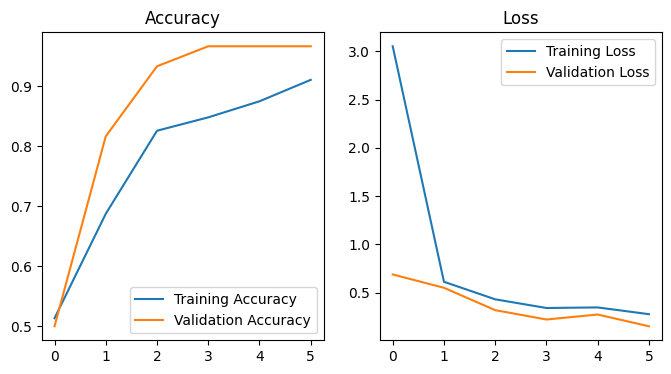

In [30]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()